In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from citipy import citipy

In [14]:
# Create a practice set of random latitude and longitude combinations.
lats = [1,2,3,4,5,6,7,8,9,10]
lngs = [1,2,3,4,5,6,7,8,9,10]
lat_lngs = zip(lats, lngs)

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

9

In [17]:
London = "London"
url = "http://api.openweathermap.org/data/2.5/weather?" + weather_api_key

In [18]:
query_url = url + "&appid=" + weather_api_key + "&q=" + London
print(query_url)

http://api.openweathermap.org/data/2.5/weather?6101a659a7d65b756966d0f1dd71a114&appid=6101a659a7d65b756966d0f1dd71a114&q=London


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&appid=" + weather_api_key + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mumford
Processing Record 2 of Set 1 | anloga
Processing Record 3 of Set 1 | cotonou
Processing Record 4 of Set 1 | warri
Processing Record 5 of Set 1 | agbor
Processing Record 6 of Set 1 | idah
Processing Record 7 of Set 1 | makurdi
Processing Record 8 of Set 1 | lafia
Processing Record 9 of Set 1 | bauchi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mumford,5.2618,-0.7590,297.98,73,92,5.55,GH,2022-07-19 10:14:01
1,Anloga,5.7947,0.8973,298.57,71,100,6.66,GH,2022-07-19 10:14:01
2,Cotonou,6.3654,2.4183,299.32,69,99,6.16,BJ,2022-07-19 10:10:15
3,Warri,5.5167,5.7500,302.28,53,99,3.09,NG,2022-07-19 10:14:02
4,Agbor,6.2518,6.1934,300.04,65,85,2.81,NG,2022-07-19 10:14:02
5,Idah,7.1065,6.7342,300.66,65,91,2.83,NG,2022-07-19 10:14:03
6,Makurdi,7.7411,8.5121,301.81,61,72,2.82,NG,2022-07-19 10:14:03
7,Lafia,8.4833,8.5167,298.76,75,100,2.52,NG,2022-07-19 10:14:03
8,Bauchi,10.5000,10.0000,301.55,56,77,3.15,NG,2022-07-19 10:14:04


In [21]:
new_column_order = ["column2", "column4", "column1"]

'http://api.openweathermap.org/data/2.5/weather?6101a659a7d65b756966d0f1dd71a114&appid=6101a659a7d65b756966d0f1dd71a114&q=bauchi'

In [29]:
new_column_order = ['City','Country','Lat','Lng','Max Temp', 'Humidity', 'Cloudiness','Wind Speed']

In [61]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mumford,GH,5.2618,-0.7590,297.98,73,92,5.55
1,Anloga,GH,5.7947,0.8973,298.57,71,100,6.66
2,Cotonou,BJ,6.3654,2.4183,299.32,69,99,6.16
3,Warri,NG,5.5167,5.7500,302.28,53,99,3.09
4,Agbor,NG,6.2518,6.1934,300.04,65,85,2.81
5,Idah,NG,7.1065,6.7342,300.66,65,91,2.83
6,Makurdi,NG,7.7411,8.5121,301.81,61,72,2.82
7,Lafia,NG,8.4833,8.5167,298.76,75,100,2.52
8,Bauchi,NG,10.5000,10.0000,301.55,56,77,3.15


In [62]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [63]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

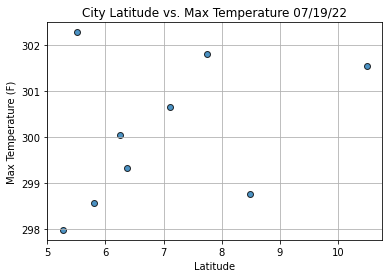

In [64]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

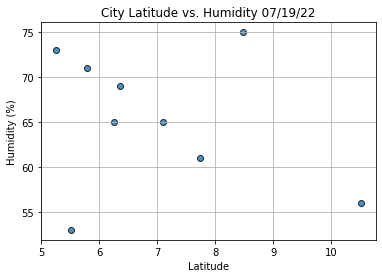

In [65]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

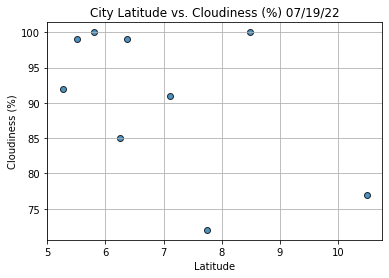

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

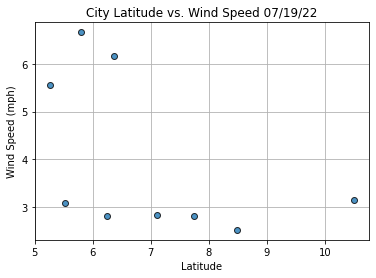

In [67]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [98]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [99]:
index8 = city_data_df.loc[8]
index8

City          Bauchi
Country           NG
Lat             10.5
Lng             10.0
Max Temp      301.55
Humidity          56
Cloudiness        77
Wind Speed      3.15
Name: 8, dtype: object

In [100]:
city_data_df["Lat"] >= 0

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
Name: Lat, dtype: bool

In [101]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mumford,GH,5.2618,-0.7590,297.98,73,92,5.55
1,Anloga,GH,5.7947,0.8973,298.57,71,100,6.66
2,Cotonou,BJ,6.3654,2.4183,299.32,69,99,6.16
3,Warri,NG,5.5167,5.7500,302.28,53,99,3.09
4,Agbor,NG,6.2518,6.1934,300.04,65,85,2.81


In [102]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

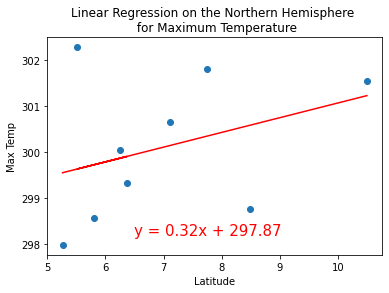

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
# CHANGE TEXT COORDINATES
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(6.5,298.2))

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

ValueError: Inputs must not be empty.

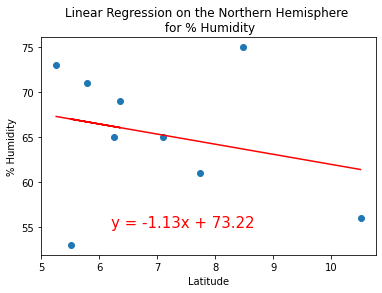

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
# CHANGE TEXT COORDINATES
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(6.2,55))

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

ValueError: Inputs must not be empty.

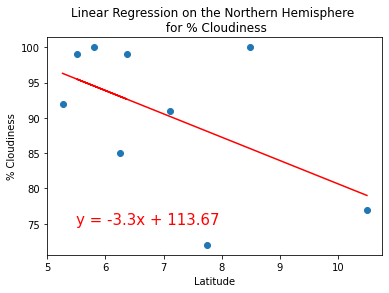

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
# CHANGE TEXT COORDINATES
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(5.5,75))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

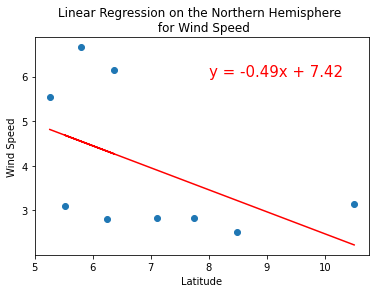

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
# CHANGE TEXT COORDINATES
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(8,6))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))